In [1]:
# Import the modules
import numpy as np
import pandas as pd
from pathlib import Path
from sklearn.metrics import confusion_matrix, classification_report,ConfusionMatrixDisplay, accuracy_score
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

---

## Split the Data into Training and Testing Sets

### Step 1: Read the `lending_data.csv` data from the `Resources` folder into a Pandas DataFrame.

In [2]:
# Read the CSV file from the Resources folder into a Pandas DataFrame
df_lending_data = pd.read_csv("Resources/lending_data.csv")

# Review the DataFrame
df_lending_data.head()

,loan_size,interest_rate,borrower_income,debt_to_income,num_of_accounts,derogatory_marks,total_debt,loan_status
0,10700.0,7.672,52800,0.431818,5,1,22800,0
1,8400.0,6.692,43600,0.311927,3,0,13600,0
2,9000.0,6.963,46100,0.349241,3,0,16100,0
3,10700.0,7.664,52700,0.430740,5,1,22700,0
4,10800.0,7.698,53000,0.433962,5,1,23000,0


### Step 2: Create the labels set (`y`)  from the “loan_status” column, and then create the features (`X`) DataFrame from the remaining columns.

In [3]:
# Separate the data into labels and features
# Separate the y variable, the labels
y = df_lending_data['loan_status']

# Separate the X variable, the features
X =df_lending_data.drop(columns='loan_status')

In [4]:
# Review the y variable Series
y[:5]

0    0
1    0
2    0
3    0
4    0
Name: loan_status, dtype: int64

In [5]:
# Review the X variable DataFrame
X.head()

,loan_size,interest_rate,borrower_income,debt_to_income,num_of_accounts,derogatory_marks,total_debt
0,10700.0,7.672,52800,0.431818,5,1,22800
1,8400.0,6.692,43600,0.311927,3,0,13600
2,9000.0,6.963,46100,0.349241,3,0,16100
3,10700.0,7.664,52700,0.430740,5,1,22700
4,10800.0,7.698,53000,0.433962,5,1,23000


### Step 3: Split the data into training and testing datasets by using `train_test_split`.

In [6]:
# Split the data using train_test_split
# Assign a random_state of 1 to the function
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=1)

---

## Create a Logistic Regression Model with the Original Data

###  Step 1: Fit a logistic regression model by using the training data (`X_train` and `y_train`).

In [7]:
# Instantiate the Logistic Regression model
# Assign a random_state parameter of 1 to the model
logistic_reg_model = LogisticRegression(solver = 'newton-cg', random_state=1)

# Fit the model using training data
logistic_reg_model.fit(X_train, y_train)

LogisticRegression(random_state=1, solver='newton-cg')

### Step 2: Save the predictions on the testing data labels by using the testing feature data (`X_test`) and the fitted model.

In [8]:
# Make a prediction using the testing data
loan_status_pred = logistic_reg_model.predict(X_test)

### Step 3: Evaluate the model’s performance by doing the following:

* Generate a confusion matrix.

* Print the classification report.

In [9]:
# Generate a confusion matrix for the model
confusion_matrix(y_test, loan_status_pred)

array([[18660,   105],
       [   41,   578]])

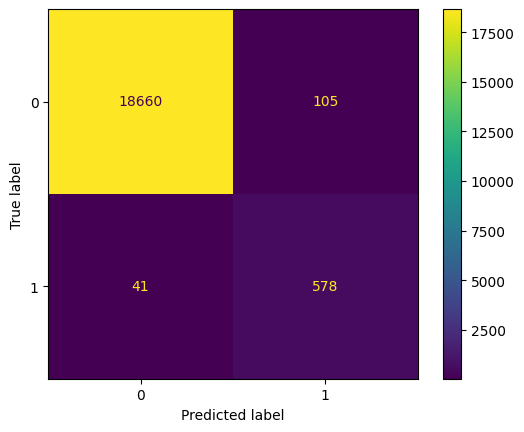

In [10]:
# Print the classification report for the model
cm = confusion_matrix(y_test, loan_status_pred)

cm_display = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=logistic_reg_model.classes_)
cm_display.plot()
plt.show()

In [12]:
acc_score = accuracy_score(y_test, loan_status_pred)

# Displaying results
#print("Confusion Matrix")
#display(cm_display)
print(f"Accuracy Score : {acc_score}")
print("Classification Report")
print(classification_report(y_test, loan_status_pred))

Confusion Matrix


Accuracy Score : 0.9924680148576145
Classification Report
              precision    recall  f1-score   support

           0       1.00      0.99      1.00     18765
           1       0.85      0.93      0.89       619

    accuracy                           0.99     19384
   macro avg       0.92      0.96      0.94     19384
weighted avg       0.99      0.99      0.99     19384



### Step 4: Answer the following question.

**Question:** How well does the logistic regression model predict both the `0` (healthy loan) and `1` (high-risk loan) labels?

**Answer:** Wtih an accuracy score of 0.9925, the model is predicting both the `0` and `1` labels with a high degree of accuracy. However with the percision of false positives of 0.85, the model is not predicting the `1` label as percisely as we would like to feel confident in the model.

---

In [13]:
# Assign a random_state parameter of 1 to the model
logistic_reg_model_2 = LogisticRegression(solver = , random_state=1)

# Fit the model using training data
logistic_reg_model_2.fit(X_train, y_train)

LogisticRegression(random_state=1)

In [14]:
# Make a prediction using the testing data
loan_status_pred_2 = logistic_reg_model_2.predict(X_test)

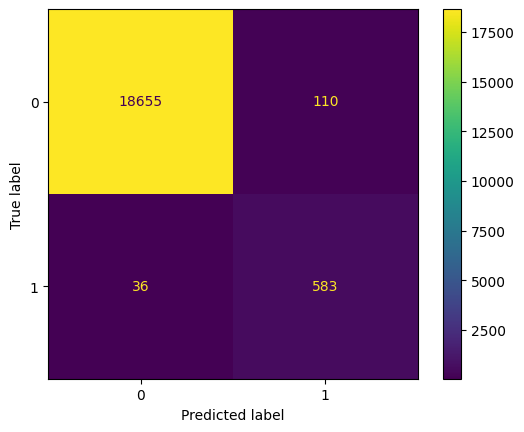

In [15]:
# Generate a confusion matrix for the model
confusion_matrix(y_test, loan_status_pred_2)

# Print the classification report for the model
cm = confusion_matrix(y_test, loan_status_pred_2)

cm_display = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=logistic_reg_model_2.classes_)
cm_display.plot()
plt.show()

In [16]:
acc_score = accuracy_score(y_test, loan_status_pred_2)

# Displaying results
#print("Confusion Matrix")
#display(cm_display)
print(f"Accuracy Score : {acc_score}")
print("Classification Report")
print(classification_report(y_test, loan_status_pred_2))

Accuracy Score : 0.9924680148576145
Classification Report
              precision    recall  f1-score   support

           0       1.00      0.99      1.00     18765
           1       0.84      0.94      0.89       619

    accuracy                           0.99     19384
   macro avg       0.92      0.97      0.94     19384
weighted avg       0.99      0.99      0.99     19384

